In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
%run Utilities.ipynb

**Метод наискорейшего спуска**

Этот метод используется для поиска минимума дифференцируемой функции 
$ f(x) = f(x_1, x_2, \ldots, x_n) $, смещая текущее решение в направлении отрицательного градиента 
$ \nabla f = [\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n}]^T $ на каждой итерации.

Метод состоит из следующих шагов:

**Инициализация:** Выбираются начальное приближение $ x_0 $, размер шага $ \gamma > 0 $, допустимая погрешность $ \varepsilon > 0 $, и максимальное количество итераций $ N $.

**Тело метода (итеративное применение):** На $ k $-ой итерации у нас есть
$ x_{k+1} = x_k - \gamma \nabla f(x_k) $

**Критерий остановки:** По окончании каждой итерации проверяем условие $ \|\nabla f(x_k)\| \leq \varepsilon $. Когда это условие выполняется или когда мы достигаем максимального допустимого числа итераций, мы прекращаем выполнение алгоритма.

In [15]:
def steepest_descent(gradf, x0, gamma, epsilon, N):
    x = np.array(x0).reshape(len(x0), 1)
    for k in range(N):
        g = gradf(x)
        x = x - gamma*g
        if np.linalg.norm(g) < epsilon:
            break
    return x

In [16]:
# y = 1/2 * x'*M*x
#
# x = [x1, x2]
# y = 1/2 * ( m_11*x1*x1 + m_12*x1*x2 + m_21*x2*x1 + m_22*x2*x2 )
def quadratic(x, M, reshape=True):
    if reshape:
        x = np.reshape(x, newshape=(len(x), 1))
    val = 1/2 * np.transpose(x) @ M @ x
    return val[0, 0]

In [17]:
# parcijalno y po x1 =  1/2 * ( 2 * m_11*x1 + m_12*x2 + m_21*x2 )
# parcijalno y po x2 = ...
#
# gradijent y po x = M*x
def quadratic_grad(x, M, reshape=True):
    if reshape:
        x = np.array(x).reshape(len(x), 1)
    return M @ x

In [18]:
steepest_descent(lambda x: quadratic_grad(x, np.eye(2)), [1, 2], 1, 1e-4, 100)

array([[0.],
       [0.]])

In [19]:
def steepest_descent_v(gradf, x0, gamma, epsilon, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    for k in range(N):
        g = gradf(x[-1])
        x.append(x[-1] - gamma*g)
        if np.linalg.norm(g) < epsilon:
            break
    return x

In [20]:
I = np.eye(2)
run_sd_I = steepest_descent_v(
    lambda x: quadratic_grad(x, I), 
    x0=[1, 1], 
    gamma=0.1, 
    epsilon=1e-4,
    N=100)


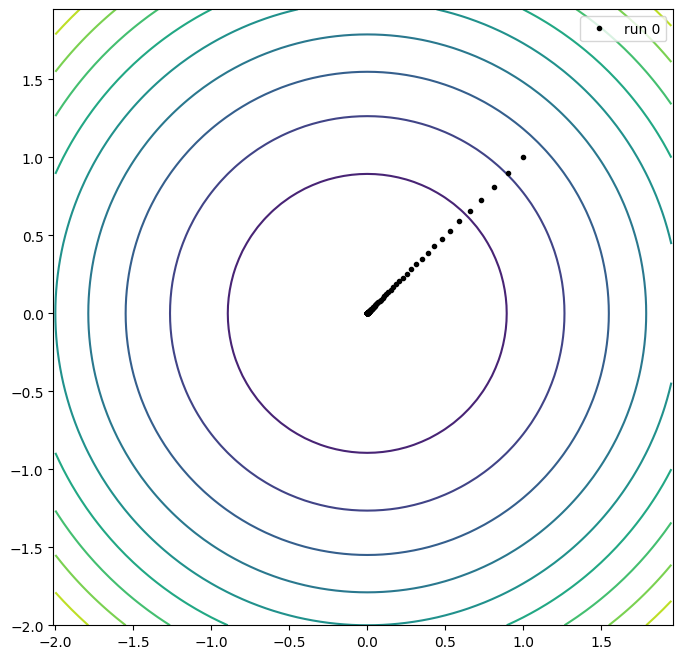

In [21]:
plot_run(lambda x: quadratic(x, np.eye(2)), [run_sd_I], np.arange(-2, 2, 0.05), np.arange(-2, 2, 0.05))


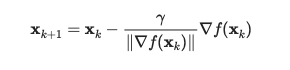

$\mathbf{x}_{k+1} = \mathbf{x}_k - \frac{\gamma}{|\nabla f(\mathbf{x}_k)|} \nabla f(\mathbf{x}_k)$

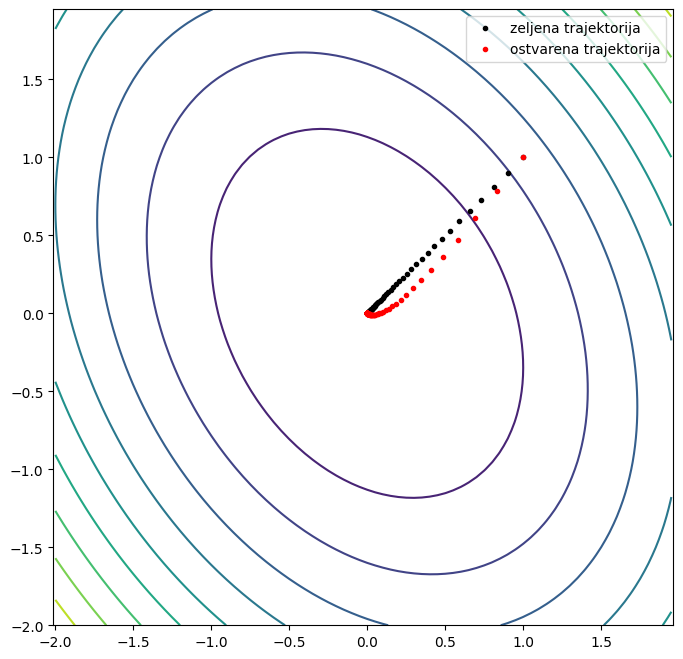

In [22]:
M1 = construct_matrix(1, 2, np.pi/6)
run_sd_M1 = run = steepest_descent_v(
    lambda x: quadratic_grad(x, M1), 
    x0=[1, 1], 
    gamma=0.1, epsilon=1e-4, N=100)
plot_run(lambda x: quadratic(x, M1), [run_sd_I, run_sd_M1], 
         np.arange(-2, 2, 0.05), np.arange(-2, 2, 0.05),
        labels=["zeljena trajektorija", "ostvarena trajektorija"])

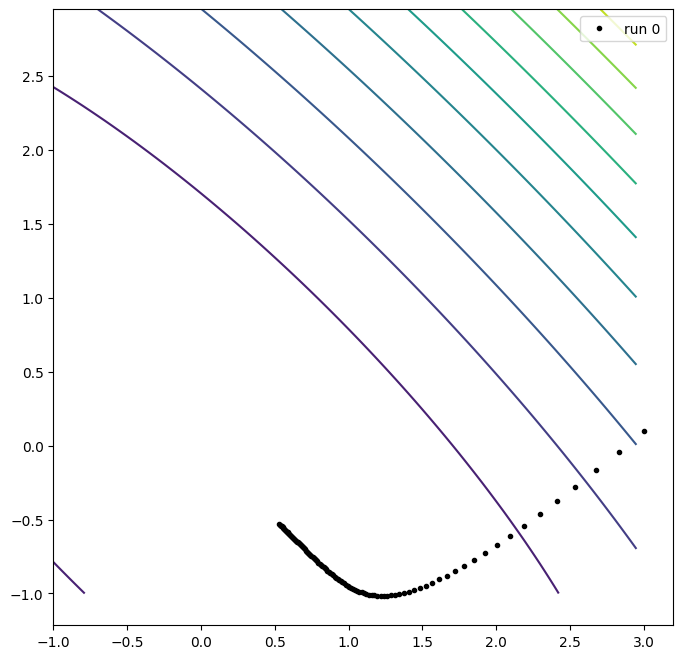

In [23]:
M2 = construct_matrix(1, 10, np.pi/4)
run_sd_M2 = steepest_descent_v(
    lambda x: quadratic_grad(x, M2), 
    x0=[3, 0.1], 
    gamma=0.01, epsilon=1e-4, N=100)
plot_run(lambda x: quadratic(x, M2), [run_sd_M2], np.arange(-1, 3, 0.05), np.arange(-1, 3, 0.05))

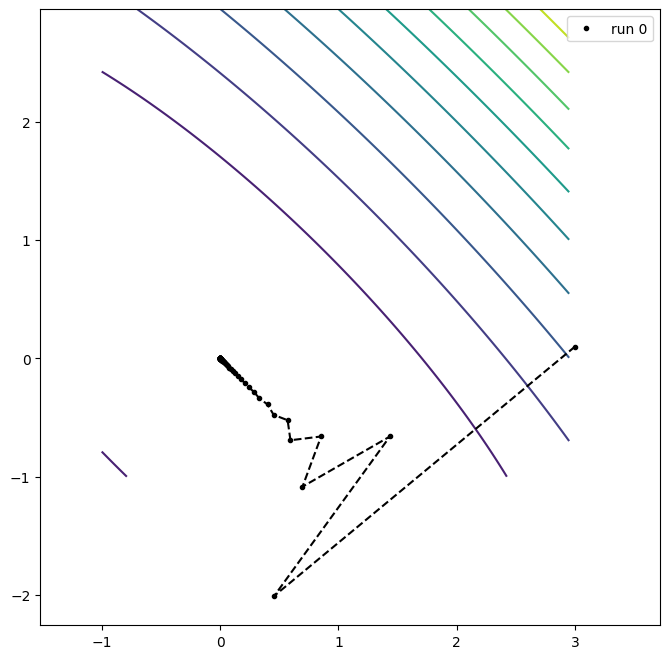

In [24]:
run_sd_M2a = steepest_descent_v(
    lambda x: quadratic_grad(x, M2), 
    x0=[3, 0.1], 
    gamma=0.15, epsilon=1e-4, N=100)
plot_run(lambda x: quadratic(x, M2), [run_sd_M2a], 
         np.arange(-1, 3, 0.05), np.arange(-1, 3, 0.05), connect_the_dots=True)

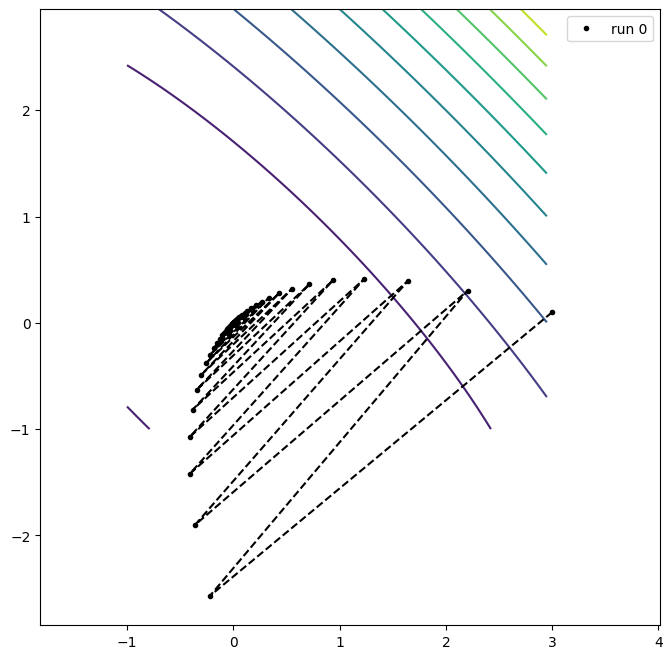

In [25]:
run_sd_bad = steepest_descent_v(
    lambda x: quadratic_grad(x, M2), 
    x0=[3, 0.1], 
    gamma=0.19, epsilon=1e-4, N=100)
plot_run(lambda x: quadratic(x, M2), [run_sd_bad], 
         np.arange(-1, 3, 0.05), np.arange(-1, 3, 0.05), connect_the_dots=True)

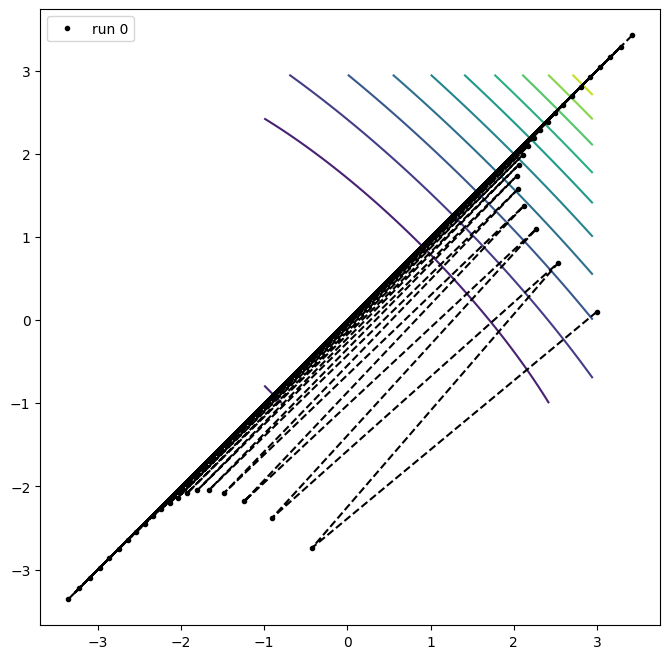

In [26]:
run_sd_bad2 = steepest_descent_v(
    lambda x: quadratic_grad(x, M2), 
    x0=[3, 0.1], 
    gamma=0.202, epsilon=1e-4, N=40)
plot_run(lambda x: quadratic(x, M2), [run_sd_bad2], 
         np.arange(-1, 3, 0.05), np.arange(-1, 3, 0.05), connect_the_dots=True)


Основные модификации метода наибыстрейшего спуска
Градиентный метод с моментом

В методе градиентного спуска с моментом, общая структура алгоритма остается неизменной, но текущая позиция в процессе поиска обновляется немного измененным способом:

$\mathbf{v}_k = \omega \mathbf{v}_{k-1} + \gamma \nabla f(\mathbf{x}_k)$
>>
$\mathbf{x}_{k+1} = \mathbf{x}_{k} - \mathbf{v}_k$


In [27]:
def steepest_descent_with_momentum_v(gradf, x0, gamma, epsilon, omega, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    v = np.zeros(shape=x[-1].shape)
    for k in range(N):
        g = gradf(x[-1])
        v = omega*v + gamma*g
        x.append(x[-1] - v)
        # U ovom algoritmu smislenije je proveravati duzinu
        # koraka (skoka) `v`, umesto samog gradijenta `g`.
        if np.linalg.norm(g) < epsilon:
            break
    return x


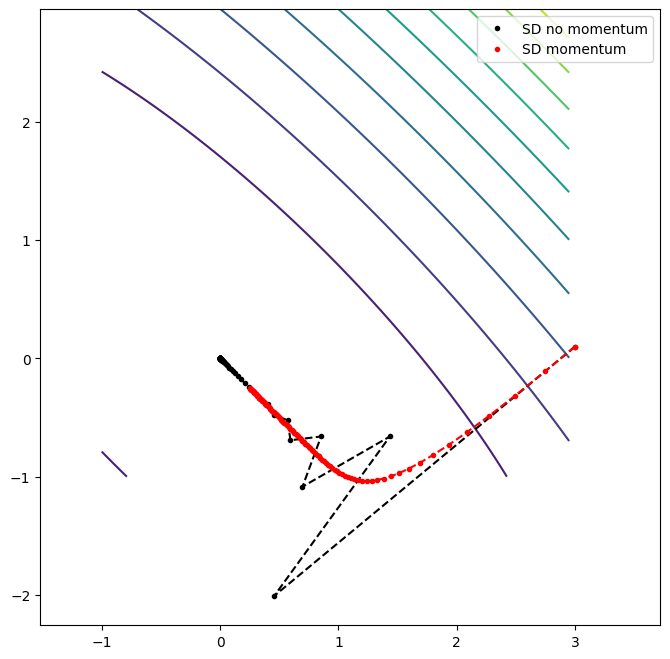

In [28]:
run_sdm_M2a = steepest_descent_with_momentum_v(
    lambda x: quadratic_grad(x, M2), 
    x0=[3, 0.1], 
    gamma=0.15*0.1, epsilon=1e-4, omega=0.15*0.9, N=100)
plot_run(lambda x: quadratic(x, M2), [run_sd_M2a, run_sdm_M2a], 
         np.arange(-1, 3, 0.05), np.arange(-1, 3, 0.05), connect_the_dots=True,
         labels=["SD no momentum", "SD momentum"])


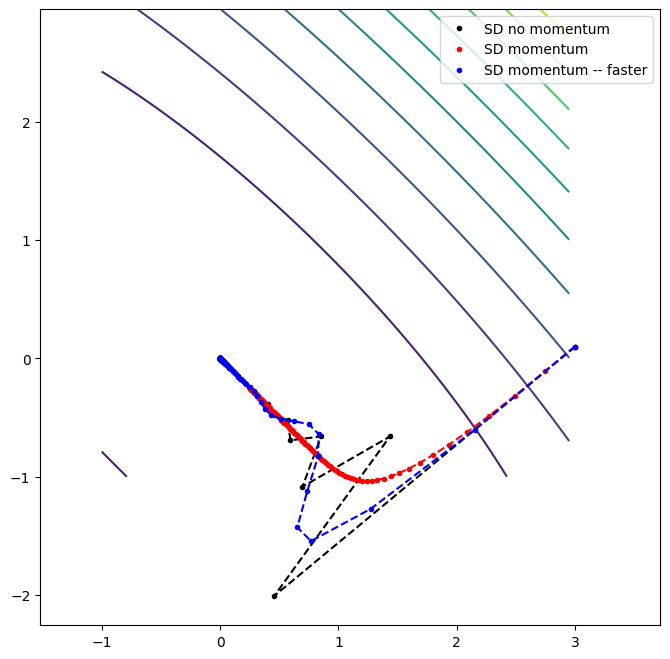

In [29]:
run_sdm_M2b = steepest_descent_with_momentum_v(
    lambda x: quadratic_grad(x, M2), 
    x0=[3, 0.1], 
    gamma=0.05, epsilon=1e-4, omega=0.5, N=100)
plot_run(lambda x: quadratic(x, M2), [run_sd_M2a, run_sdm_M2a, run_sdm_M2b], 
         np.arange(-1, 3, 0.05), np.arange(-1, 3, 0.05), connect_the_dots=True,
         labels=["SD no momentum", "SD momentum", "SD momentum -- faster"])

ПОЧЕМУ ЭТО ИМЕЕТ СМЫСЛ? Мы можем представить процесс оптимизации как скольжение шарика (текущего решения) (с трением) вниз по крутому склону (критерию оптимальности). Момент придает этому представлению дополнительный физический смысл: момент - в некотором смысле - представляет собой энергию, которую мы накапливаем в процессе движения. В результате скорости будут фильтроваться: компоненты скорости, которые остаются постоянно направленными из итерации в итерацию, будут суммироваться, в то время как компоненты переменного направления будут взаимно уничтожаться.

## УСКОРЕННЫЙ ГРАДИЕНТ NESTEROV ##

Основная идея ускоренного градиента Нестерова заключается в том, что градиент вычисляется в будущей точке.

>>
### $\mathbf{x}'_k = \mathbf{x}_{k-1} - \omega\mathbf{v}_{k-1}$ ###
>>
### $\mathbf{v}_k = \omega \mathbf{v}_{k-1} + \gamma \nabla f(\mathbf{x}'_k)$ ###
>>
### $\mathbf{x}_{k+1} = \mathbf{x}_{k} - \mathbf{v}_k$ ###
>>
Ключевым моментом в ускоренном градиенте Нестерова является то, что градиент вычисляется не в текущей точке, а в предполагаемой будущей точке. Таким образом, мы придаем всей процедуре определенный предсказательный характер, ожидая улучшения ее общего поведения.


In [30]:
def nesterov_gradient_descent_v(gradf, x0, gamma, epsilon, omega, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    v = np.zeros(shape=x[-1].shape)
    for k in range(N):
        xpre = x[-1] - omega*v   # x_k prim
        g = gradf(xpre)
        v = omega*v + gamma*g
        x.append(x[-1] - v)
        if np.linalg.norm(g) < epsilon:
            break
    return x

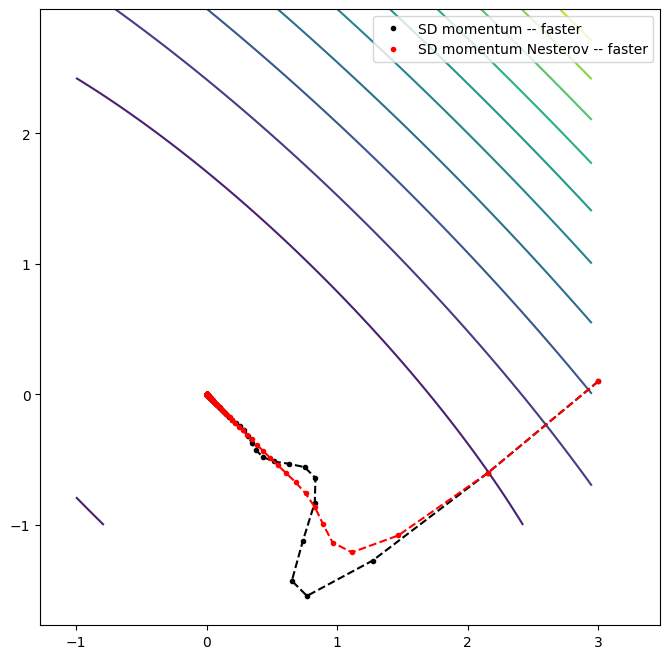

In [31]:
run_sd_nesterov_M2b = nesterov_gradient_descent_v(
    lambda x: quadratic_grad(x, M2), 
    x0=[3, 0.1], 
    gamma=0.05, epsilon=1e-4, omega=0.5, N=100)
plot_run(lambda x: quadratic(x, M2), [run_sdm_M2b, run_sd_nesterov_M2b], 
         np.arange(-1, 3, 0.05), np.arange(-1, 3, 0.05), connect_the_dots=True,
        labels=["SD momentum -- faster", "SD momentum Nesterov -- faster"])

Сравнение рассмотренных ранее алгоритмов на более сложном примере
Теперь рассмотрим поведение предыдущих алгоритмов на более сложном примере.
>> 
### $f(x_1, x_2) = 1.5 x_1^2 + x_2^2 - 2 x_1 x_2 + 2 x_1^3 + 0.5 x_1^4$ ###

In [32]:
plot_criterion(demo_criterion, np.arange(-3.5, 2.5, 0.1), np.arange(-3.5, 2.5, 0.1), mesh=True)


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 800x800 with 0 Axes>

In [ ]:
plot_criterion(demo_criterion, np.arange(-3.5, 2.5, 0.1), np.arange(-3.5, 2.5, 0.1), levels=20)


In [ ]:
demo_run_sd = steepest_descent_v(
    grad_demo_criterion, 
    x0=[2, 2], 
    gamma=0.01, epsilon=1e-4, N=100)
demo_run_sdm = steepest_descent_with_momentum_v(
    grad_demo_criterion, 
    x0=[2, 2], 
    gamma=0.05, epsilon=1e-4, omega=0.5, N=100)
demo_run_nesterov = nesterov_gradient_descent_v(
    grad_demo_criterion, 
    x0=[2, 2], 
    gamma=0.05, epsilon=1e-4, omega=0.5, N=100)
plot_run(demo_criterion, [demo_run_sd, demo_run_sdm, demo_run_nesterov], 
         np.arange(-3.5, 2.5, 0.1), np.arange(-3.5, 2.5, 0.1), 
         connect_the_dots=True, labels=["SD", "SD with momentum", "SD nesterov"])

# Адаптивные градиентные методы #
Основная проблема всех рассмотренных ранее алгоритмов заключается в том, что скорость адаптации одинакова по всем осям. Это означает, что эти алгоритмы неэффективны (трудно настроить параметры) в случаях, когда критерий изменяется гораздо быстрее вдоль одной оси, чем вдоль другой. Если небольшое изменение одной переменной приводит к большим изменениям критерия оптимальности, то эту переменную следует изменять медленно, маленькими шагами. В противном случае, если небольшие изменения одной переменной приводят к незначительным изменениям критерия оптимальности, то эту переменную следует изменять быстро, большими шагами. Другими словами, скорость адаптации должна быть разной для каждой оси!

**АДАГРАД**

## АДАГРАД ##

Adagrad использует адаптивный градиент, специфичный для каждой оси (каждой переменной).

Пусть $ g_{k, i} $ - градиент критерия оптимальности по $ i $-й переменной в $ k $-й итерации,

$ G_{k, i} = \sum_{j=1}^{k} (g_{j, i})^2 $

где $ G_{k, i} $ - сумма квадратов градиентов по $ i $-й переменной до $ k $-й итерации.

Обновление $ i $-й переменной:

$ x_{k+1, i} = x_{k, i} - \frac{\eta}{\sqrt{G_{k, i} + \epsilon}} g_{k, i} $

где $ \eta $ - скорость обучения, $ \epsilon $ - малая константа, предотвращающая деление на ноль.

Этот метод позволяет каждой переменной адаптивно регулировать скорость обучения, учитывая её историю градиентов.

In [ ]:
def adagrad_v(gradf, x0, gamma, epsilon1, epsilon, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    v = np.zeros(shape=x[-1].shape)
    G = [np.zeros(shape=x[-1].shape)]
    for k in range(N):
        g = np.asarray(gradf(x[-1]))
        G.append(G[-1] + np.multiply(g, g))
        v = gamma * np.ones(shape=G[-1].shape)/np.sqrt(G[-1] + epsilon1) * g
        x.append(x[-1] - v)
        if np.linalg.norm(g) < epsilon:
            break
    return x, G

In [ ]:
run_adagrad_M2, G = adagrad_v(
    lambda x: quadratic_grad(x, M2), 
    x0=[3, 0.1], 
    gamma=1, epsilon1=1e-6, epsilon=1e-6, N=100)
plot_run(lambda x: quadratic(x, M2), [run_adagrad_M2, run_sd_M2, run_sd_nesterov_M2b], 
         np.arange(-1, 3, 0.05), np.arange(-1, 3, 0.05), connect_the_dots=True,
         labels=["adagrad", "SD", "SD momentum Nesterov -- faster"])

### Основная проблема алгоритма ADAGRAD  заключается в аккумуляции градиентов в размере $G$, который постоянно увеличивается со временем. Это приводит к эффективному уменьшению длины шага во всех измерениях, что в конечном итоге снижает эффективность алгоритма с течением времени (из итерации в итерацию)!



In [ ]:
g1 = [1/np.sqrt(g[0,0]+1e-6) for g in G]
g2 = [1/np.sqrt(g[1,0]+1e-6) for g in G]
plt.plot(g1[2:], label="brzina ucenja u prvoj komponenti")
plt.plot(g2[2:], label="brzina ucenja u drugoj komponenti")
plt.grid()

In [ ]:
demo_run_adagrad, _ = adagrad_v(
    grad_demo_criterion, 
    x0=[2, 2], 
    gamma=1, epsilon1=1e-6, epsilon=1e-6, N=100)
plot_run(demo_criterion, [demo_run_sd, demo_run_sdm, demo_run_nesterov, demo_run_adagrad], 
         np.arange(-3.5, 2.5, 0.1), np.arange(-3.5, 2.5, 0.1), 
         connect_the_dots=True, labels=["SD", "SD with momentum", "SD nesterov", "SD adagrad"])

**RMSProp**

Алгоритм RMSProp работает аналогично ADAGRAD, за исключением того, что квадраты градиента не накапливаются бесконечно. Вместо этого вводится процедура, которая поверхностно напоминает процедуру введения момента в градиентном алгоритме.

$ G_{k+1, i} = \omega G_{k, i} + (1 - \omega) g_{k, i}^2  $

Типичное значение параметра $ \omega $ - 0.9.

Предположим, что $ g^2 $ постоянно. Когда выражение выше сходится, значение $ G $ в установившемся состоянии будет
$ G = \omega G + (1 - \omega) g^2 $
Иными словами, $ G = g^2 $

In [ ]:
def rmsprop_v(gradf, x0, gamma, omega, epsilon1, epsilon, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    v = np.zeros(shape=x[-1].shape)
    G = [np.zeros(shape=x[-1].shape)]
    for k in range(N):
        g = np.asarray(gradf(x[-1]))
        G.append(omega*G[-1] + (1-omega)*np.multiply(g, g))
        v = gamma * np.ones(shape=g.shape)/np.sqrt(G[-1] + epsilon1) * g
        x.append(x[-1] - v)
        if np.linalg.norm(g) < epsilon:
            break
    return x, G

In [ ]:
run_rmsprop_M2, G = rmsprop_v(
    lambda x: quadratic_grad(x, M2), 
    x0=[3, 0.1], 
    gamma=0.1, omega=0.9, epsilon1=1e-6, epsilon=1e-6, N=100)
plot_run(lambda x: quadratic(x, M2), [run_adagrad_M2, run_rmsprop_M2], 
         np.arange(-1, 3, 0.05), np.arange(-1, 3, 0.05), connect_the_dots=True,
         labels=["adagrad", "rmsprop"])

In [ ]:
g1 = [1/np.sqrt(g[0,0]+1e-6) for g in G]
g2 = [1/np.sqrt(g[1,0]+1e-6) for g in G]
plt.plot(g1[2:], label="brzina ucenja u prvoj komponenti")
plt.plot(g2[2:], label="brzina ucenja u drugoj komponenti")
plt.grid()

In [ ]:
demo_run_rmsprop, _ = rmsprop_v(
    grad_demo_criterion, 
    x0=[2, 2], 
    gamma=0.1, omega=0.9, epsilon1=1e-6, epsilon=1e-6, N=100)
plot_run(demo_criterion, [demo_run_nesterov, demo_run_adagrad, demo_run_rmsprop], 
         np.arange(-3.5, 2.5, 0.1), np.arange(-3.5, 2.5, 0.1), 
         connect_the_dots=True, labels=["SD nesterov", "SD adagrad", "SD rmsprop"])

### ADADELTA ###

Алгоритм ADADELTA подобен алгоритму RMSProp, и они были предложены примерно в одно и то же время, независимо друг от друга. Разница заключается в том, что ADADELTA не требует от пользователя ввода параметра $ \gamma $. Он вычисляется автоматически. Сначала определяется величина $ T_{k+1, i} = \omega T_{k, i} + (1 - \omega) \Delta x_{k}^2 $, а затем определяется $ \gamma_{k, i} = \sqrt{T_{k, i} + \epsilon} $, так что в конце концов
$ x_{k+1, i} = x_{k, i} - \frac{\sqrt{T_{k, i} + \epsilon}}{\sqrt{G_{k, i} + \epsilon}} g_{k, i} $

In [ ]:
def adadelta_v(gradf, x0, omega, epsilon1, epsilon, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    v = np.ones(shape=x[-1].shape)
    G = [np.zeros(shape=x[-1].shape)]
    T = [np.zeros(shape=x[-1].shape)]
    for k in range(N):
        g = np.asarray(gradf(x[-1]))
        G.append(omega*G[-1] + (1-omega)*np.multiply(g, g))
        T.append(omega*T[-1] + (1-omega)*np.multiply(v, v))
        v = np.sqrt(T[-1] + epsilon1)/np.sqrt(G[-1] + epsilon1) * g
        x.append(x[-1] - v)
        if np.linalg.norm(g) < epsilon:
            break
    return x, G

In [ ]:
run_adadelta_M2, _ = adadelta_v(
    lambda x: quadratic_grad(x, M2), 
    x0=[3, 0.1], 
    omega=0.9, epsilon1=1e-6, epsilon=1e-6, N=100)
plot_run(lambda x: quadratic(x, M2), [run_adagrad_M2, run_adadelta_M2], 
         np.arange(-1, 3, 0.05), np.arange(-1, 3, 0.05), connect_the_dots=True,
         labels=["adagrad", "adadelta"])

In [ ]:
g1 = [1/np.sqrt(g[0,0]+1e-6) for g in G]
g2 = [1/np.sqrt(g[1,0]+1e-6) for g in G]
plt.plot(g1[2:], label="brzina ucenja u prvoj komponenti")
plt.plot(g2[2:], label="brzina ucenja u drugoj komponenti")
plt.grid()

In [ ]:
demo_run_adadelta, _ = adadelta_v(
    grad_demo_criterion, 
    x0=[2, 2], 
    omega=0.9, epsilon1=1e-6, epsilon=1e-6, N=100)
plot_run(demo_criterion, [demo_run_nesterov, demo_run_adagrad, demo_run_rmsprop, demo_run_adadelta], 
         np.arange(-3.5, 2.5, 0.1), np.arange(-3.5, 2.5, 0.1), 
         connect_the_dots=True, labels=["SD nesterov", "SD adagrad", "SD rmsprop", "SD adadelta"])

**ADAM**

ADAM (ADAPTIVE MOMENT ESTIMATION) - одна из наиболее широко используемых современных модификаций алгоритма наискорейшего спуска.

Сначала определяются вспомогательные величины:

$ m_k = \omega_1 m_{k-1} + (1 - \omega_1) g_k $
$ v_k = \omega_2 v_{k-1} + (1 - \omega_2) g_{k}^2 $

и их скорректированные версии:

$ \hat{m}_k = \frac{m_k}{1 - \omega_1^k} $
$ \hat{v}_k = \frac{v_k}{1 - \omega_2^k} $

Затем текущее решение обновляется по алгоритму:

$ x_{k+1} = x_k - \frac{\gamma}{\sqrt{\hat{v}_k} + \epsilon} \hat{m}_k $

In [ ]:
def adam_v(gradf, x0, gamma, omega1, omega2, epsilon1, epsilon, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    v = [np.ones(shape=x[-1].shape)]
    m = [np.ones(shape=x[-1].shape)]
    for k in range(N):
        g = np.asarray(gradf(x[-1]))
        m.append(omega1*m[-1] + (1-omega1)*g)
        v.append(omega2*v[-1] + (1-omega2)*np.multiply(g, g))
        hat_v = np.abs(v[-1]/(1-omega2)) # abs je neophodan zbog numerickih problema kada v padne blizu nule!
        hat_m = m[-1]/(1-omega1)
        x.append(x[-1] - gamma * np.ones(shape=g.shape)/np.sqrt(hat_v + epsilon1) * hat_m)
        # print(gamma * np.ones(shape=g.shape)/np.sqrt(hat_v + epsilon1) * hat_m)
        # print(x[-1])
        if np.linalg.norm(g) < epsilon:
            break
    return x, v, m


In [ ]:
run_adam_M2, v, m = adam_v(
    lambda x: quadratic_grad(x, M2), 
    x0=[3, 0.1], 
    gamma=0.091, omega1=0.9, omega2=0.99, epsilon1=1e-6, epsilon=1e-6, N=100)
plot_run(lambda x: quadratic(x, M2), [run_adagrad_M2, run_adadelta_M2, run_adam_M2], 
         np.arange(-1, 3, 0.05), np.arange(-1, 3, 0.05), connect_the_dots=True,
         labels=["adagrad", "adadelta", "adam"])


In [ ]:
demo_run_adam, _, _ = adam_v(
    grad_demo_criterion, 
    x0=[2, 2], 
    gamma=0.0001, omega1=0.9, omega2=0.999, epsilon1=1e-6, epsilon=1e-6, N=100)
plot_run(demo_criterion, [demo_run_adagrad, demo_run_rmsprop, demo_run_adadelta, demo_run_adam], 
         np.arange(-3.5, 2.5, 0.1), np.arange(-3.5, 2.5, 0.1), 
         connect_the_dots=True, labels=["SD adagrad", "SD rmsprop", "SD adadelta", "SD adam"])
